# Matrix-based scaling experiment
> More scaling, this time with the matrix-based generator and solver

In [1]:
import sys
sys.path.append('/home/phil/aptr')
%load_ext autoreload
%autoreload 2

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.simulation_new import make_tables
from src.database import RnaDB
from src.torch_solver import TorchSolver

In [3]:
rnadb = RnaDB(
    path_to_dnaA = "../data/allDnaA.tsv",
    path_to_16s = "../data/allSSU.tsv",
)

In [258]:
# This takes about 5 minutes for 100 samples
abundances, log_ptrs, otus = make_tables(
    n_genomes=10,
    n_samples=20,
    db=rnadb,
    sparsity=0,
    multiplier=1
)

In [259]:
solver = TorchSolver(otus=otus, db=rnadb)

Using OTU index for md5s


In [260]:
otus

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
06b47dc6f7b5e001a4b05ccd72731091,13916.0,1.040302e+14,1.683000e+03,1065.0,833.0,1602.0,2492.0,636.0,836.0,692.0,673.0,8106.0,10785.0,3768.0,1272.0,6218.0,6674.0,8933.0,912.0,441.0
ab027b0408539ee60e3a2ac3903012a5,16183.0,1.164159e+14,1.629000e+03,1099.0,894.0,1745.0,2833.0,681.0,944.0,809.0,716.0,9026.0,12077.0,4169.0,1395.0,6896.0,7692.0,9435.0,1027.0,525.0
3c41ff8672f9c63ea35ca60158a5305d,1227.0,1.320940e+05,7.500000e+02,918.0,1088784.0,544.0,690.0,52096.0,2423.0,2369.0,139173.0,918.0,8612.0,587.0,2609.0,21512.0,641.0,10360.0,1617.0,1262.0
2831dfe6e01859ec53aab7d7dc44b37c,1330.0,2.087700e+05,1.383000e+03,1392.0,1304785.0,973.0,1054.0,57729.0,3286.0,2674.0,142412.0,1094.0,9721.0,1255.0,3275.0,31923.0,1177.0,13681.0,1839.0,1277.0
c6fa7c52044ab43ca36083ad89be35e4,117682.0,3.645000e+03,1.758801e+10,2690.0,2532.0,1457.0,23343.0,1782.0,1230.0,136165.0,3429.0,2511.0,26913.0,1788.0,120386.0,4566.0,2417.0,8462.0,4018.0,9698.0
ee110998a5699e5c841f4ecb034be2cb,55080.0,1.509000e+03,8.552562e+09,1029.0,971.0,483.0,9209.0,849.0,352.0,50590.0,1466.0,1028.0,9501.0,628.0,43148.0,2195.0,1030.0,3831.0,1982.0,4475.0
eb27f8acdf3df7b81f21dec717c233ed,51055261.0,9.144000e+03,3.133900e+04,4698.0,10638.0,51446.0,3429.0,4824.0,1969263.0,3133.0,7314.0,6933.0,5977.0,2874.0,11595.0,6888.0,2660.0,3842.0,89807.0,2929.0
23d2c9e32f4067267b2d8f78bf04dc2d,53577882.0,9.074000e+03,3.327100e+04,4816.0,11099.0,55111.0,3781.0,4975.0,2230560.0,3544.0,8162.0,8066.0,6225.0,2980.0,11632.0,8005.0,2895.0,4063.0,93550.0,3275.0
9a69076bb2d207e8f8afe794ad0e10b7,18477300.0,3.066000e+03,1.166800e+04,1628.0,3729.0,19472.0,1280.0,1691.0,814370.0,1275.0,2891.0,2897.0,2070.0,990.0,3903.0,3013.0,1033.0,1306.0,32277.0,1274.0
2c07de22ec0e86602d8cd8baf3cd9bc8,764.0,9.950000e+02,3.810200e+04,2459.0,13742.0,3341.0,2624.0,2705.0,177140030.0,2443.0,1253.0,3298.0,1588.0,2432.0,6235.0,1417.0,1560357.0,8616.0,3657.0,10442.0


In [261]:
solver.train()

Initial:	 17.453157424926758
Epoch 0:	 0.0007743706810288131
Epoch 1:	 0.00021097747958265245
Epoch 2:	 7.420262409141287e-05
Epoch 3:	 3.938191366614774e-05
Epoch 4:	 2.498396315786522e-05
Epoch 5:	 1.5910398360574618e-05
Epoch 6:	 9.28988720261259e-06
Epoch 7:	 4.796516805072315e-06
Epoch 8:	 2.195645038227667e-06
Epoch 9:	 9.391200705977099e-07
Epoch 10:	 4.4207820337760495e-07
Epoch 11:	 2.5886760113280616e-07
Epoch 12:	 1.780605032308813e-07
Epoch 13:	 1.3281355393246486e-07
Epoch 14:	 1.0238065328849189e-07
Epoch 15:	 8.126343686853943e-08
Epoch 16:	 6.76623272966026e-08
Epoch 17:	 5.901623367776665e-08
Epoch 18:	 5.327420993239684e-08
Epoch 19:	 4.9286459358199863e-08
Epoch 20:	 4.64062068772364e-08
Epoch 21:	 4.4249471642388016e-08
Epoch 22:	 4.2581252301943096e-08
Epoch 23:	 4.125226027440476e-08
Epoch 24:	 4.016787258365184e-08
Epoch 25:	 3.926401248577349e-08
Epoch 26:	 3.8499372578826296e-08
Epoch 27:	 3.7843719269403664e-08
Epoch 28:	 3.7276080888659635e-08
Epoch 29:	 3.67

(array([[-2.84980106e+00, -4.30224419e+00, -3.82760501e+00,
          8.56851041e-01,  3.45109129e+00, -1.09493411e+00,
         -7.10486710e-01,  2.30209017e+00, -3.99580169e+00,
         -1.07422960e+00,  2.84642553e+00, -5.27583718e-01,
         -5.07695556e-01,  4.63618368e-01, -8.47479522e-01,
          1.08864546e+00, -3.29681420e+00,  1.16897035e+00,
         -1.59612501e+00, -9.29695308e-01],
        [-1.03234398e+00, -3.91880536e+00,  6.76362228e+00,
          9.82162535e-01, -3.08602738e+00, -1.13737214e+00,
          1.81836164e+00, -1.84762406e+00, -3.74671650e+00,
          2.42713475e+00, -1.42110014e+00, -2.19565392e-01,
          1.33624613e-01,  2.70643562e-01,  2.33870268e+00,
         -1.61569858e+00, -2.80782843e+00,  2.15862636e-02,
         -1.52909970e+00,  4.86480474e-01],
        [ 4.15413570e+00, -5.08893061e+00, -4.60733128e+00,
          9.10297036e-01, -2.43129134e+00,  1.75203156e+00,
         -5.72489798e-01, -1.24748313e+00,  1.33571580e-01,
         -1.

In [282]:
def score(solver, true_log_abundances, true_log_ptrs):
    inferred_ptrs = pd.DataFrame(
        data=solver.B_hat.exp().detach().numpy(),
        index=solver.genome_ids,
        columns=solver.sample_ids,
    )
    inferred_abundances = pd.DataFrame(
        data=solver.A_hat.exp().detach().numpy(),
        index=solver.genome_ids,
        columns=solver.sample_ids,
    )
    true_ptrs = np.exp(true_log_ptrs).reindex(inferred_ptrs.index)
    true_abundances = np.exp(true_log_abundances).reindex(inferred_abundances.index)

    ptr_score = true_ptrs - inferred_ptrs
    abundance_score = true_abundances - inferred_abundances
    return ptr_score, abundance_score, inferred_ptrs, inferred_abundances


results = pd.DataFrame()
for n_genomes in range(1, 20):
    print(n_genomes)
    log_abundances, log_ptrs, otus = make_tables(
        n_genomes=n_genomes,
        n_samples=5 * (20 - n_genomes), # same number of samples for each
        db=rnadb,
        sparsity=0,
        multiplier=100,
    )
    solver = TorchSolver(otus=otus, db=rnadb)
    solver.train(lr=0.1, clip=True)
    B_scores, A_scores, B_inf, A_inf = score(
        solver=solver,
        true_log_ptrs=log_ptrs,
        true_log_abundances=log_abundances,
    )
    for i, genome_id in enumerate(solver.genome_ids):
        for j, sample_id in enumerate(solver.sample_ids):
            try:
                results = results.append(
                    {
                        "n_genomes": n_genomes,
                        "genome": genome_id,
                        "sample": sample_id,
                        "true_ptr": np.exp(log_ptrs.loc[genome_id, sample_id]),
                        "inferred_ptr": B_inf.loc[genome_id, sample_id],
                        "inferred_abundance": A_inf.loc[genome_id, sample_id],
                        "abundance" : np.exp(log_abundances.loc[genome_id, sample_id]),
                        "ptr_score": B_scores.loc[genome_id, sample_id],
                        "abundance_score": A_scores.loc[genome_id, sample_id],
                        "n_reads": otus.loc[db[genome_id]["md5"].unique(), sample_id].sum(),
                    },
                    ignore_index=True,
                )
            except:
                pass

results


1
Using OTU index for md5s
Initial:	 4.925411224365234
Epoch 0:	 6.734658608564814e-09
Epoch 1:	 8.095671688579387e-09
Epoch 2:	 2.820329303432345e-09
Epoch 3:	 5.831204852313476e-09
Epoch 4:	 2.8552271658099926e-08
Epoch 5:	 4.611516857266906e-08
Epoch 6:	 9.469083295243763e-09
Epoch 7:	 3.616876043111006e-08
Epoch 8:	 2.35635031486936e-08
2
Using OTU index for md5s
Initial:	 6.520373344421387
Epoch 0:	 3.4316067853978893e-07
Epoch 1:	 7.126199079721118e-07
Epoch 2:	 3.685538843001268e-07
Epoch 3:	 3.9774675997250597e-07
Epoch 4:	 1.450876396802414e-07
Epoch 5:	 3.7270211805662257e-07
Epoch 6:	 5.381509140534035e-07
Epoch 7:	 5.165883294466767e-07
Epoch 8:	 6.710223487971234e-07
Epoch 9:	 2.338966567094758e-07
Epoch 10:	 3.207126155757578e-07
3
Using OTU index for md5s
Initial:	 23.108619689941406
Epoch 0:	 4.532688180347577e-08
Epoch 1:	 1.6578946215872747e-08
Epoch 2:	 4.178475165872442e-08
Epoch 3:	 3.2559810847487825e-08
Epoch 4:	 5.3954863687977195e-08
Epoch 5:	 1.354521401708552

Text(0, 0.5, 'Error')

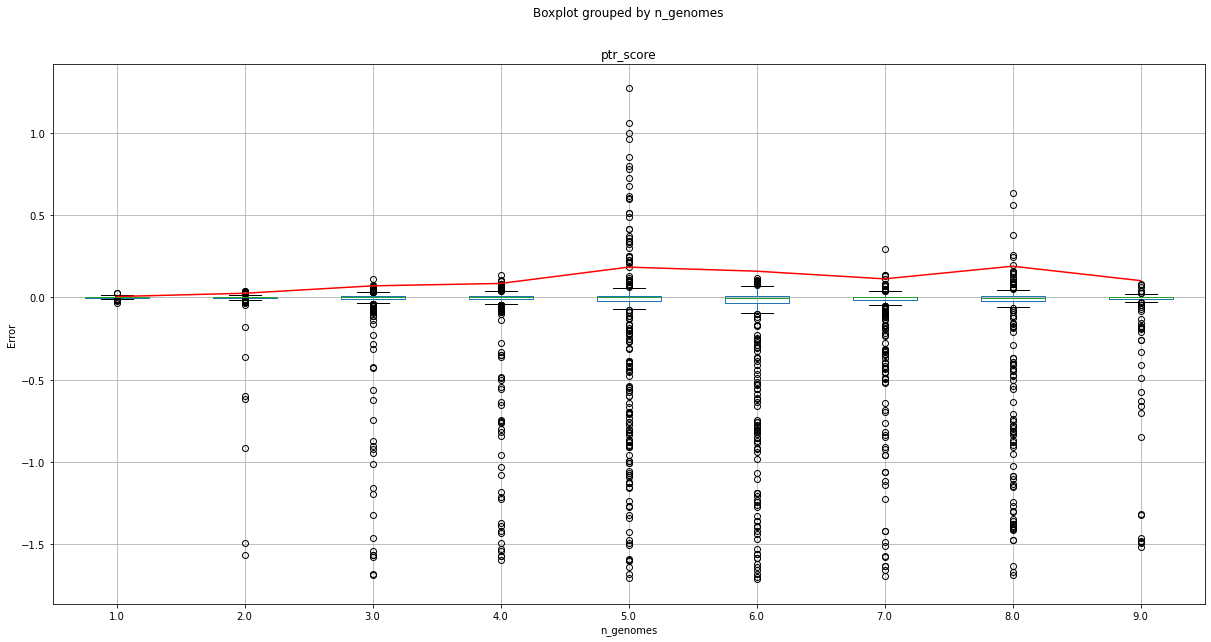

In [279]:
results.boxplot(by="n_genomes", column="ptr_score", figsize=(20, 10))

# Draw error on same figure with different y axis
plt.plot(np.arange(1, 10), results[["n_genomes", "ptr_score"]].abs().groupby("n_genomes").mean()["ptr_score"], c="red")
plt.ylabel("Error")
plt.xlabel("")